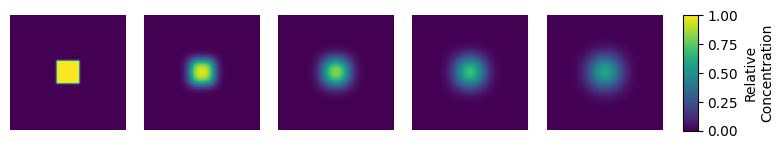

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

def smooth(x):
    n = len(x)
    result = np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            result[i,j] = np.average(x[i-1:i+2,j-1:j+2])
    return result

def diffuse(x, d):
    n = len(x)
    result = np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            total = np.sum(x[i-1:i+2,j-1:j+2]) - x[i,j]

            result[i,j] = x[i,j] + total * d - x[i,j] * 8 * d
    return result

n = 40
N = 4

grid = np.zeros((n, n))
grid[16:24,16:24] = 1

gs_kw = dict(width_ratios=[1, 1, 1, 1, 1, .2], wspace=0)
fig, axes = plt.subplots(1, N + 2, figsize=(9,1.5), gridspec_kw=gs_kw)
fig.subplots_adjust(wspace=0, hspace=0)

pcm = axes[0].imshow(grid, vmin=0, vmax=1)
axes[0].axis("off")
for i in range(N):
    for j in range(2 ** N):
        grid = diffuse(grid, 0.03)
        axes[i+1].imshow(grid, vmin=0, vmax=1)
        axes[i+1].axis("off")
axes[-1].axis("off")
cbar = fig.colorbar(pcm, ax = axes[-1], fraction=0.55, aspect=8)
cbar.set_label("Relative\nConcentration")

glue("diffusion", fig, display=False)









# Cellular Automata

A cellular automaton is a collection of cells on a rectangular grid that evolves through a number of discrete time steps according to a set of rules based on the states of neighbouring cells. The rules are then applied iteratively for as many time steps as desired.

You will investigate a cellular automaton model as part of your group project.

```{figure} epidemic.png
---
height: 200px
name: epidemic-fig
---
Cellular automata models of the spread of an epidemic on a 2-dimensional grid of cells. Each timestep corresponds to one day {footcite}`gagliardi2010small`.
```

## Diffusion Model

Diffusion is the movement of a substance from an area of high concentration to an area of lower concentration. For example, suppose we have an 2-dimensional region which is initially empty except for a square region at the centre where we inject a high concentration of a chemical. As time progresses, the chemical gradually diffuses throughout the region until the concentration is everywhere equal ({numref}`diffusion-fig`).

```{glue:figure} diffusion
:figwidth: 600px
:name: "diffusion-fig"

A chemical introduced into the centre of a square region (left) gradually diffuses across the region. Eventually the chemical would be distributed evenly throughout the region.
```

We can model this using a 2-dimensional array representing the concentration at each point in space ({numref}`diffusion-fig`). At each timestep, the concentration $x_{i,j}$ at each point changes as the chemical flows between the 8 immediate neighbouring cells.

We can construct a (very crude) model of diffusion using 2d averaging. In this model, we repeatedly apply a moving average, so that at each timestep the concentration of cell `x[i,j]` is replaced by the average of the 9 cells in the 3 by 3 subarray centred at `i,j`.

In [23]:
def moving_average_2d(x):
    # create empty array of correct dimensions
    n, m = x.shape
    result = np.zeros((n, m))
    
    # fill in moving avg
    for i in range(1, n-1):
        for j in range(1, m-1):
            sub_array = x[i-1:i+2, j-1:j+2]
            result[i, j] = np.average(sub_array)
           
    return result

:::{exercise}
:label: exercise_5_3

Build a simulation model similar to {numref}`diffusion-fig`. First create an square array whose elements are zero everywhere except for a square of cells in the centre. Then repeatedly apply the function `moving_average_2d`. Use `plt.subplots` and `plt.imshow` to plot the array at each timestep.

Experiment with different arrays sizes. Can you achieve a result that looks like {numref}`diffusion-fig`?
:::

## 1-Dimensional Cellular Automaton

An elementary cellular automaton comprises a 1-dimensional array whose values are only `1` or `0`. At each time step, the value of each cell is updated by a rule based on the state of the cell and its two nearest neighbours. For example, the transition rules for the 'rule 90' cellular automaton are shown in {numref}`rule-90-fig` and the resulting cellular automaton in {numref}`rule-90-result-fig`.

```{figure} rule_90.png
---
height: 80
name: rule-90-fig
---
The rules for the 'rule 90' cellular automaton, showing the new state of each cell (bottom) based on the current state of three neighbouring cells (top). This rule can more simply expressed by noticing that if exactly one of the left and right neighbours is `1`, the cell's state becomes `1`, otherwise it becomes `0`.
```

```{figure} rule_90_result.png
---
height: 150px
name: rule-90-result-fig
---
The 'rule 90' cellular automaton starting from an initial state comprising a single `1`. Each row is one iteration of the automaton.
```

The code below calulates one iteration of the 'rule 90' cellular automaton.

In [24]:
def rule_90(xarray):
    n = len(xarray)
    result = np.zeros(n)
    for i in range(1, n-1):
        p = xarray[i-1] # left neighbour
        q = xarray[i+1] # right neighbour
        # p + q = 1 when
        # one of p and q is 1
        if (p + q == 1):
            result[i] = 1
        else:
            result[i] = 0
    return result

x = np.zeros(7)
x[3] = 1
print(x)
print(rule_90(x))

[0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 1. 0. 0.]


To generate an image of the cellular automaton we can create a 2-dimensional array, storing each iteration one row at a time.

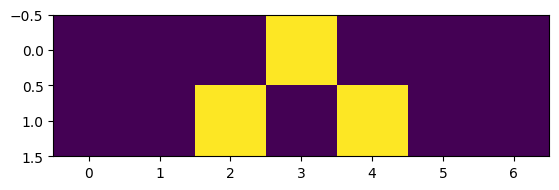

In [25]:
automaton = np.zeros((2, 7)) # 2-d array 
x = np.zeros(7)
x[3] = 1

# top row is initial state of x
automaton[0,:] = x

x = rule_90(x)

# next row is next state of x
automaton[1,:] = x

plt.imshow(automaton)

:::{exercise}
:label: exercise_5_3_b

1. Produce a plot similar to {numref}`rule-90-result-fig` showing the first 16 iterations of the 'rule 90' automaton.

2. Produce a simulation of the 'rule 30' cellular automaton as described here https://mathworld.wolfram.com/ElementaryCellularAutomaton.html.  
Hint: let $n$ be the number of `1`s amongst the three neighbours. If $n=0$ or $n=3$ then set the cell to `0`, if $n=1$ then set the cell to `1`. If $n=2$ then set the cell to `1` only if the left neighbour is `0`.
:::

(conway-game-of-life)=
## Conway's Game of Life

The [Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a simple cellular automaton devised by mathematician John Conway in 1970. The automaton mimics the dynamical evolution of "life-forms" existing in the grid of cells {numref}`game-of-life-fig` shows an example evolution of the Game of Life.

```{figure} GOL.gif
---
height: 300px
name: game-of-life-fig
---
The Game of Life is an example of a 2-dimensional cellular automaton.
```

The rules of Conway's Game of Life are given below, and an example of two iterations of the Game are shown in {numref}`game-of-life-2-iterations-fig`.

```{card} The Rules of Conway's Game of Life

1. Start with a rectangular grid of cells, each of which is "alive" (black) or "dead" (white).
2. Count the number of each cell’s 8 immediate neighbours that are alive, and  
  a. any live cell with fewer than 2 live neighbours dies;  
  b. any live cell with more than 3 live neighbours dies;  
  c. any live cell with 2 or 3 live neighbours lives on;  
  d. any dead cell with exactly three live neighbours becomes alive, and otherwise stays dead.
3. Repeat step 2 as many times as desired.
```

```{figure} game_of_life_example.png
---
height: 150px
name: game-of-life-2-iterations-fig
---
An initial configuration of cells (left) and two iterations of the Game of Life (centre and right).
```

```{exercise}
:label: exercise_5_4

What would the next iteration of the Game of Life in {numref}`game-of-life-2-iterations-fig` look like?

Using pseudocode, sketch an algorithm for calculating one iteration of the Game of Life.
```

Below is template code for a Python program which executes a single iteration of the game of life. The grid is represented by an `n` by `n` array where dead cells are `0` and live cells are `1`. The function `count_neighbours` calculates the number of live neighbours of single cell, whereas the function `advance` calculates the next iteration of the entire grid of cells. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def count_neighbours(x, i, j):
    pass
    # Return the number of live neighbours
    # of the cell at position i, j
    # (NB you should delete 'pass' which
    # is a Python keyword which does nothing)

def advance(x):
    pass
    # Loop over each of the cells in the array x.
    # For each cell, determine the number of live neighbours.
    # Use the game of life rules to determine if the cell lives or dies.
    # Finally, set the value of the equivalent cell in the output array.


n = 5
grid0 = np.zeros((n, n))

# set the initial value of grid0 where
# 0 represents 'alive' and 1 represents 'dead'  

print("grid0:")
print(grid0)

# Simulation code goes here



grid1:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
grid2:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


:::{exercise}
:label: exercise_5_5

 1\. Complete the function `count_neighbours(x, i, j)` so that it returns the total number of live neighbours of cell `i`, `j`. Test that the function works by setting `grid0` to the initial configuration in {numref}`game-of-life-2-iterations-fig` and checking your function gives the expected result for various values of `i` and `j`.  

 2\. Complete the function `advance(x)` so that it returns the array after applying the rules of the Game of Life simulation. Test the function by applying it to the initial configuration in {numref}`game-of-life-2-iterations-fig`.  
 
 3\. By repeatedly calling `advance`, execute the simulation for 10 or more steps, using `imshow` to display the array at each step. Check that your simulation works by comparing to an [online Game of Life simulator](https://academo.org/demos/conways-game-of-life/).
 
:::